# Understanding the Objective
### The purpose of this data is to evaluate the effectiveness of the telephone marketing campaigns of a Portuguese bank, which aims to encourage customers to subscribe to term deposits by making multiple calls to them. At the end of each campaign, it is determined whether the customer "subscribed" to these deposits or "did not subscribe."

# Import dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/banking target.csv")

In [ ]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [ ]:
#age=سن /marital=وضعیت تاهل /education=تحصیلات /	default=بدهی	/balance= موجودی	/housing=مسکن	/loan=وام	/contact=راه تماس	/day=روز تماس	/
#month=ماه تماس	/duration= مدت زمان تماس	/campaign= تعداد تماس کمپینگ اخر	/pdays=فاصله دوکمپینگ اخر/	previous=تعداد کمپینگ قبلی
#/poutcome=نتیجه بازار یابی	/y=سپرده گذاری

# Assess data

### In this section, we will check the raw data and get an understanding of what kind of data we are dealing with.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df["education"].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [ ]:
df["job"].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [ ]:
df["contact"].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [ ]:
df.describe(include="O").T

count unique          top   freq
job        45211     12  blue-collar   9732
marital    45211      3      married  27214
education  45211      4    secondary  23202
default    45211      2           no  44396
housing    45211      2          yes  25130
loan       45211      2           no  37967
contact    45211      3     cellular  29285
month      45211     12          may  13766
poutcome   45211      4      unknown  36959
y          45211      2           no  39922

In [ ]:
df.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

# Clean Data

In [ ]:
df = df.rename(columns={"y" : "target"})
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

In [ ]:
df["target"] = df["target"].replace({"yes" : "deposit", "no" : "no_deposit"})

## EDA

In [ ]:
#importکتابخانه ها
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

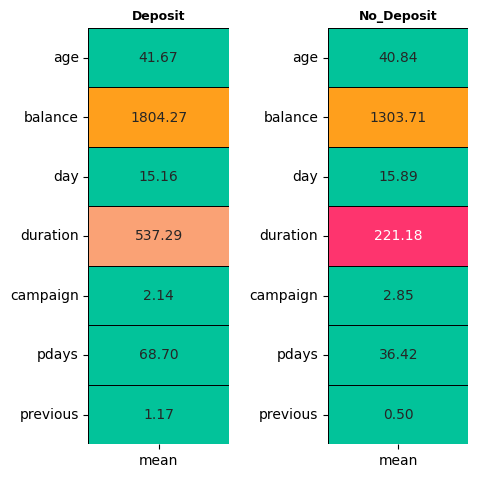

In [ ]:
#mean بر حسب target مصور سازی
Deposit = df[df['target'] == "deposit"].describe().T
No_Deposit = df[df["target"] == "no_deposit"].describe().T

colors = ['#02c39a', '#512b58', '#fe346e', '#faa275', '#ff9b54', '#6fffe9', '#63474d',
          '#373f51', '#1b1b1e', '#e71d36', '#011627', '#ff9f1c']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))

#نمودار اول
plt.subplot(1,2,1)
sns.heatmap(Deposit[["mean"]], annot = True, cmap = colors, linewidths = 0.4, linecolor = "black", cbar =False, fmt = ".2f")
plt.title("Deposit", fontsize = 9, fontweight = "bold")

#نمودار دوم
plt.subplot(1,2,2)
sns.heatmap(No_Deposit[["mean"]], annot = True, cmap = colors, linewidths= 0.4, linecolor = "black", cbar = False, fmt =".2f" )
plt.title("No_Deposit", fontsize = 9, fontweight= "bold")

fig.tight_layout(pad = 1.5)


In [ ]:
#دسته بندی ستون ها
numerical_features = []
categorical_features = []

for column in list (df.columns):
  if df[column].dtypes =="O":
    categorical_features.append(column)
  else:
    numerical_features.append(column)

print("Numerical Features:")
print(numerical_features)
print("Categorical Features:")
print(categorical_features)


Numerical Features:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'target']


In [ ]:
#مصور سازی کتگوریکال ها برحسب مقدارشان
#ساخت تابع

def visualize_categoricals_variable(Variable, count_plot_title, pie_plot_title, a_explode):
  fig = plt.subplots(nrows = 1, ncols = 2, figsize =(12,5) )
  plt.subplot(1,2,1)
  ax =sns.countplot(x = Variable, data=df, palette = colors, edgecolor = "black",
                order = df[Variable].value_counts().index, width = 0.8)
  plt.title(count_plot_title, fontsize = 9, fontweight = "bold")
  plt.xticks(rotation = 90, fontsize = 9, fontweight = "bold")
  plt.yticks(fontsize = 9, fontweight = "bold")
  plt.xlabel(Variable, fontsize = 9, fontweight = "bold")
  plt.ylabel("count",fontsize = 9, fontweight = "bold")



  plt.subplot(1,2,2)
  l = df[Variable].value_counts()
  pie_plot = l.plot.pie(autopct = "%1.1f%%", shadow = True, colors = colors, explode = a_explode)
  plt.ylabel("")
  plt.title(pie_plot_title, fontsize = 9, fontweight = "bold")

  plt.show()

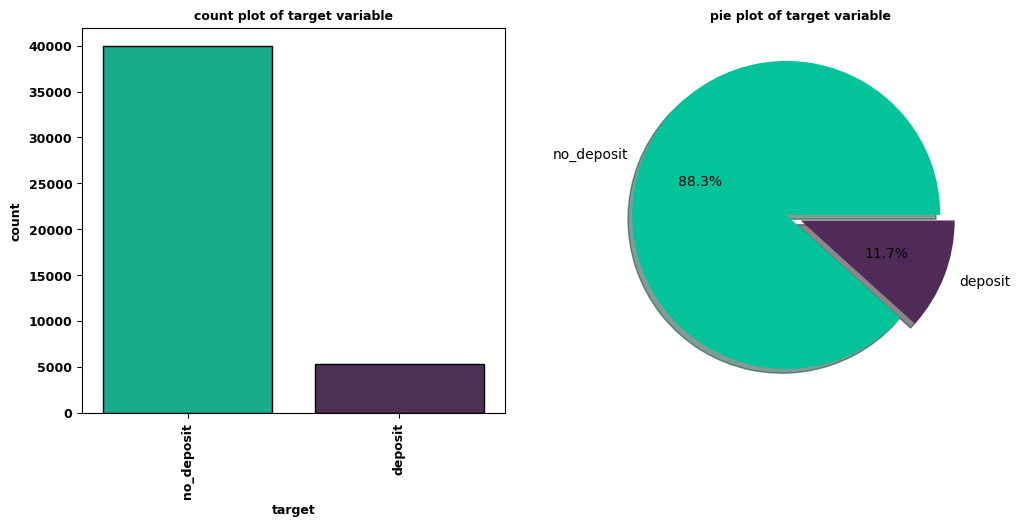

In [ ]:
#target
a_explode = [0.1,0]
visualize_categoricals_variable("target", "count plot of target variable", "pie plot of target variable", a_explode)

In [ ]:
#تعداد یونیک شغل
df["job"].nunique()

12

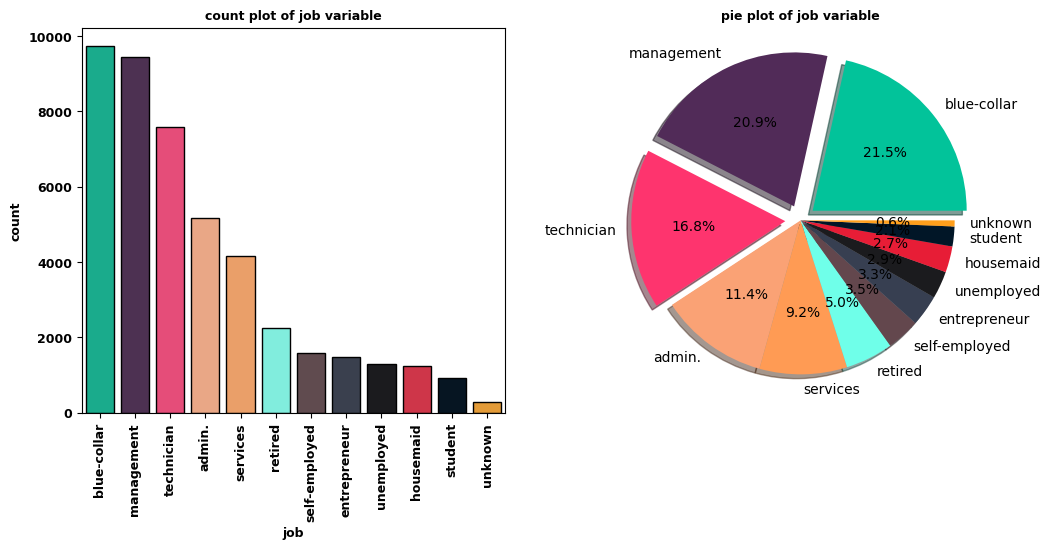

In [ ]:
#job
a_explode = [0.1,0.1,0.1] + [0]* (df["job"].nunique()-3)
visualize_categoricals_variable("job", "count plot of job variable", "pie plot of job variable", a_explode)

In [ ]:
df['marital'].nunique()

3

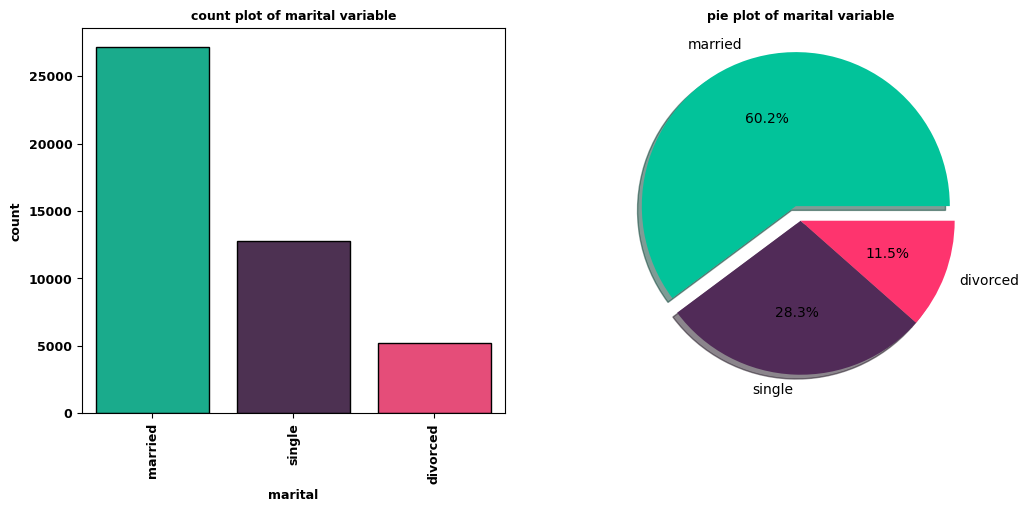

In [ ]:
a_explode = [0.1,0,0]
visualize_categoricals_variable("marital", "count plot of marital variable", "pie plot of marital variable", a_explode)

In [ ]:
df["education"].nunique()

4

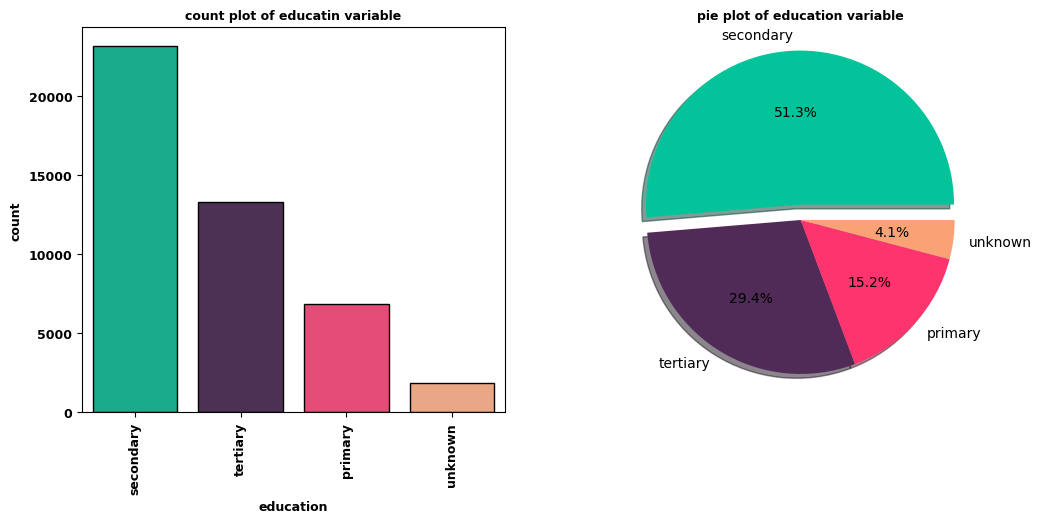

In [ ]:
a_explode = [0.1,0,0,0]
visualize_categoricals_variable("education", "count plot of educatin variable", "pie plot of education variable", a_explode)

In [ ]:
df["default"].nunique()

2

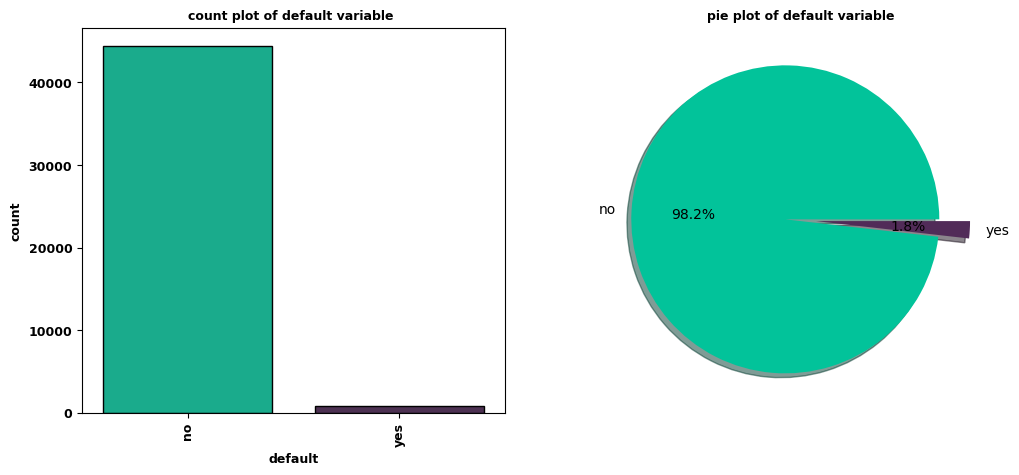

In [ ]:
a_explode = [0.1,0.1]
visualize_categoricals_variable("default", "count plot of default variable ", "pie plot of default variable", a_explode)

In [ ]:
df["housing"].nunique()

2

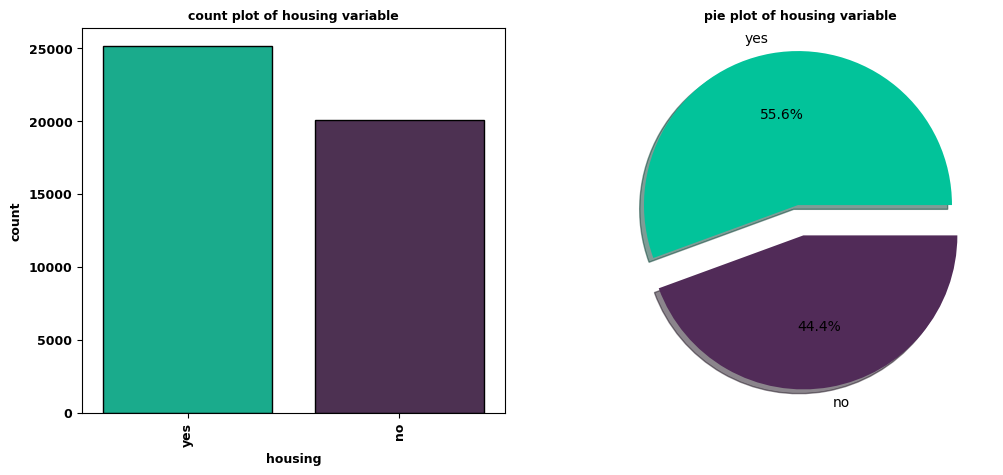

In [ ]:
a_explode = [0.1,0.1]
visualize_categoricals_variable("housing",  "count plot of housing variable", "pie plot of housing variable", a_explode)

In [ ]:
df['loan'].nunique()

2

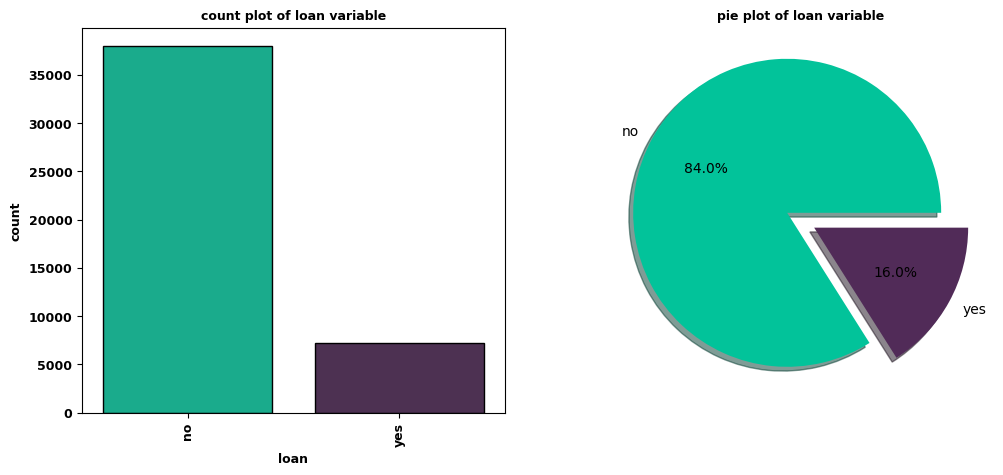

In [ ]:
a_explode = [0.1,0.1]
visualize_categoricals_variable("loan", "count plot of loan variable", "pie plot of loan variable", a_explode)

In [ ]:
df["contact"]. nunique()

3

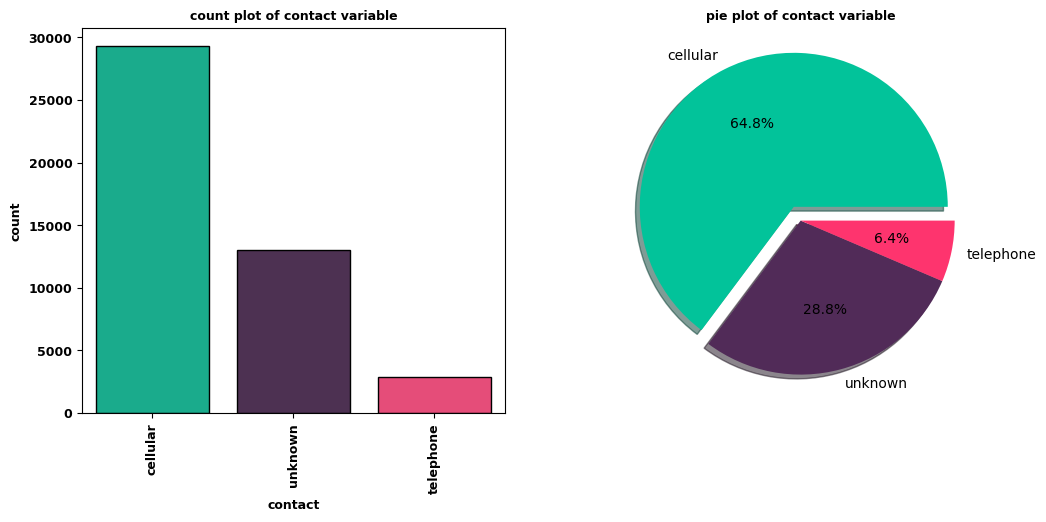

In [ ]:
a_explode = [0.1,0,0]
visualize_categoricals_variable("contact", "count plot of contact variable", "pie plot of contact variable", a_explode)

In [ ]:
df['month'].nunique()

12

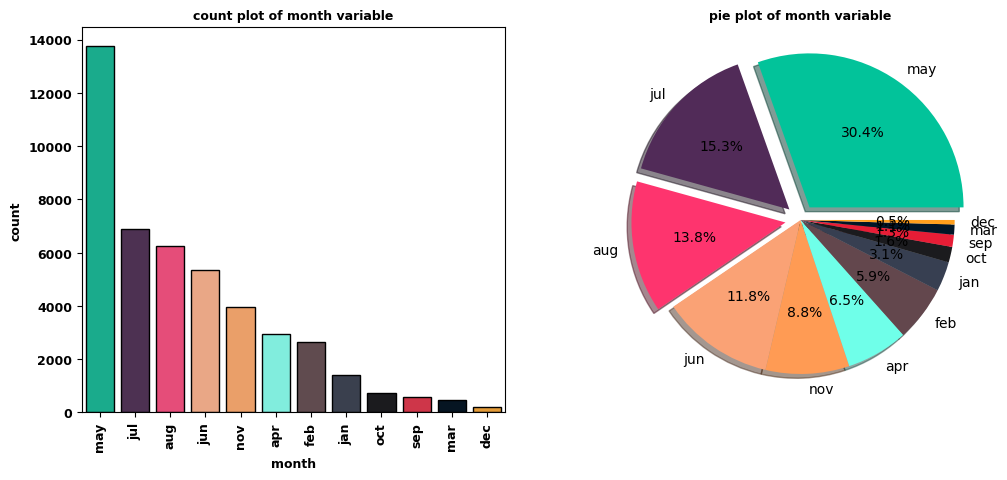

In [ ]:
a_explode = [0.1,0.1,0.1] + [0]*(df['month'].nunique()-3)
visualize_categoricals_variable("month", "count plot of month variable", "pie plot of month variable",a_explode)

In [ ]:
df['poutcome'].nunique()

4

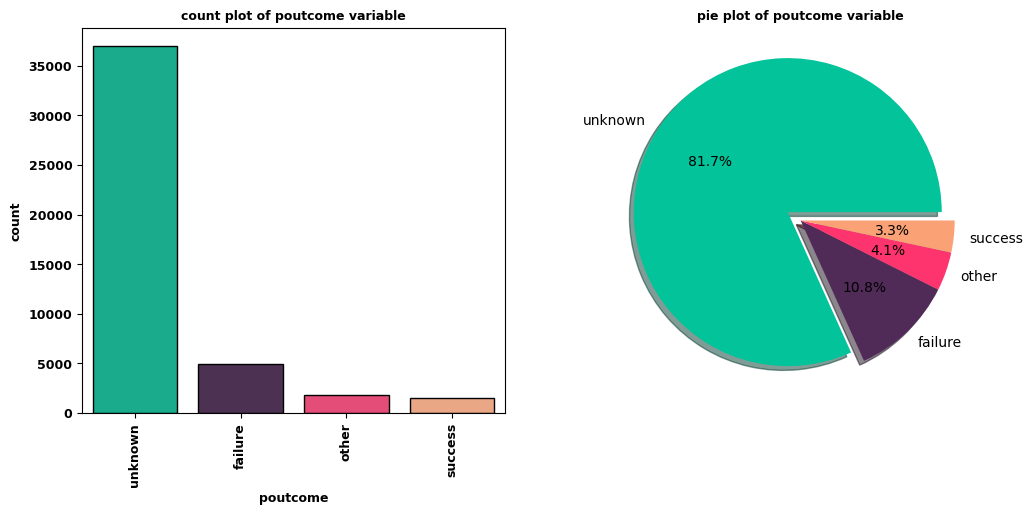

In [ ]:
a_explode = [0.1,0,0,0]
visualize_categoricals_variable("poutcome", "count plot of poutcome variable", "pie plot of poutcome variable", a_explode)

In [ ]:
df = df.drop(df[(df['job']=="unknown")| (df["education"]=="unknown")].index)

In [ ]:
df.shape

(43193, 17)

In [ ]:
#مصورسازی کتگوریکال ها برحسب مقدارشان وو ستون تارگت
#نمودار پای  انها برحسب deposit
def visualize_categoricals_variable_vs_target_deposit(Variable, count_plot_title
                                                      , pie_plot_title, a_explode
                                                      , a,b ):#figsize(a,b)
    fig = plt.subplots(nrows=1, ncols=2, figsize=(a,b))

    plt.subplot(1,2,1)
    ax = sns.countplot(x=Variable, data=df,palette= colors, edgecolor="black",
                       order = df[Variable].value_counts().index, width=0.8,
                       hue="target")
    plt.title(count_plot_title, fontsize=9, fontweight="bold")
    plt.xticks(rotation= 90, fontsize=9, fontweight="bold")
    plt.yticks(fontsize=9, fontweight="bold")
    plt.ylabel("count", fontsize=9, fontweight="bold",)
    plt.xlabel(Variable, fontsize=9, fontweight="bold")

    plt.subplot(1,2,2)
    l = df[df["target"]=="deposit"][Variable].value_counts()
    pie_plot = l.plot.pie(autopct="%1.1f%%", shadow=True, colors=colors,
                          explode=a_explode)
    plt.ylabel("")
    plt.title(pie_plot_title,fontsize=9, fontweight="bold" )

    plt.show()




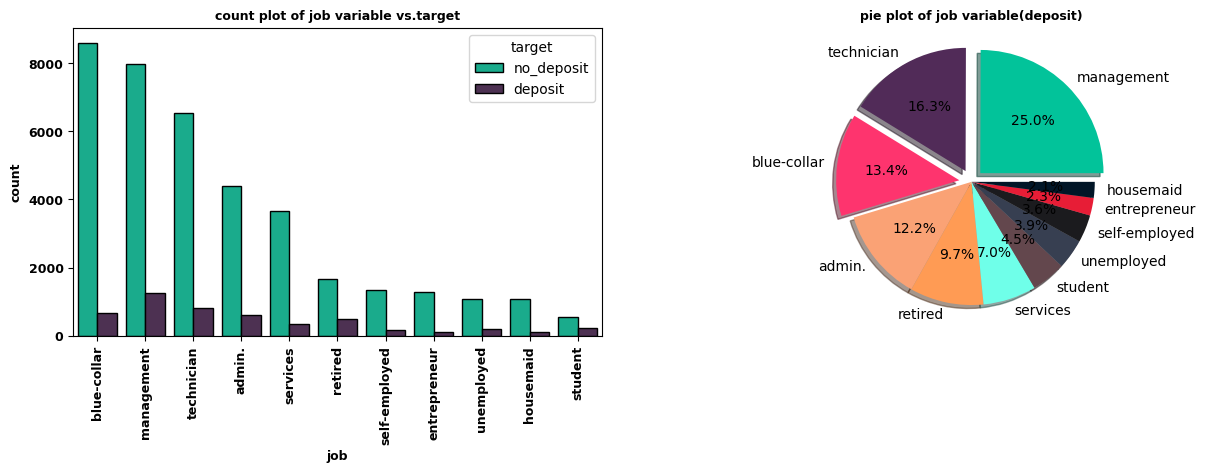

In [ ]:
a_explode = [0.1,0.1,0.1]+[0]*(df["job"].nunique()-3)
visualize_categoricals_variable_vs_target_deposit("job", "count plot of job variable vs.target"
, "pie plot of job variable(deposit)", a_explode, 15,4 )

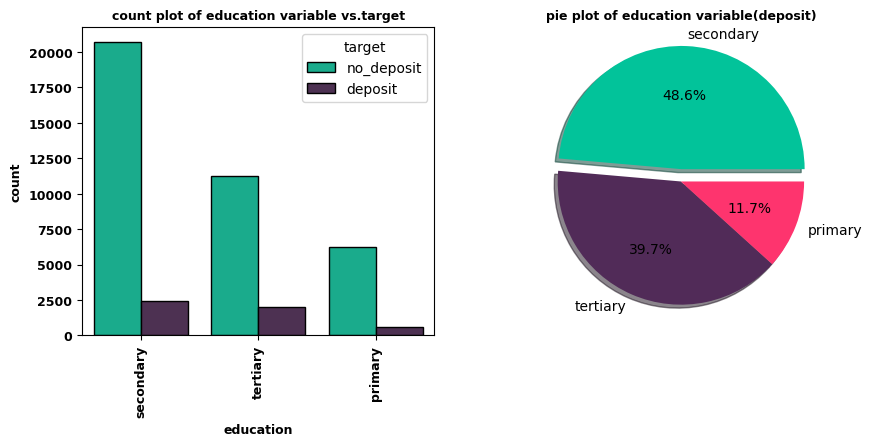

In [ ]:
a_explode=[0.1,0,0]
visualize_categoricals_variable_vs_target_deposit("education", "count plot of education variable vs.target",
                                                  "pie plot of education variable(deposit)", a_explode, 10,4)

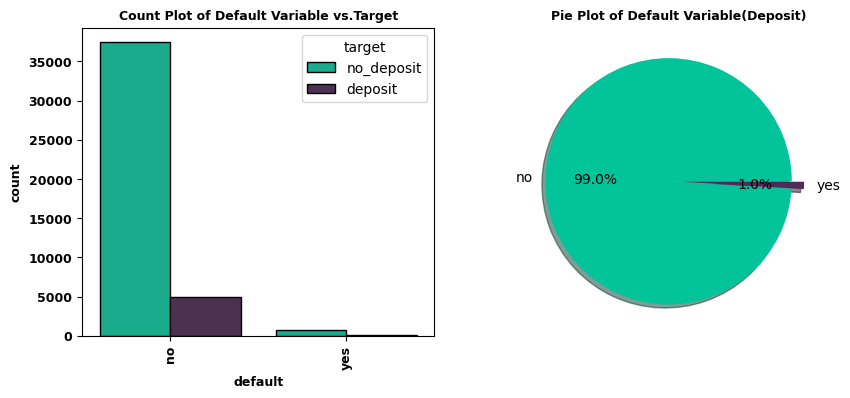

In [ ]:
a_explode=[0.1,0]
visualize_categoricals_variable_vs_target_deposit("default","Count Plot of Default Variable vs.Target",
                                                  "Pie Plot of Default Variable(Deposit) ",
                                                  a_explode, 10,4)

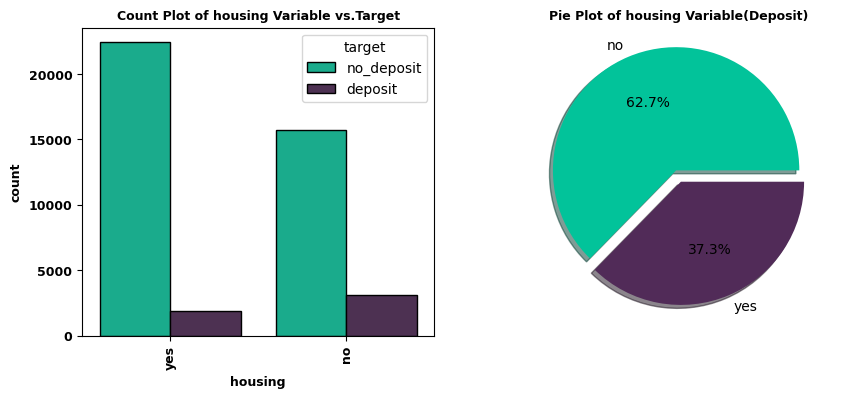

In [ ]:
a_explode=[0.1,0]
visualize_categoricals_variable_vs_target_deposit("housing","Count Plot of housing Variable vs.Target",
                                                  "Pie Plot of housing Variable(Deposit) ",
                                                  a_explode, 10,4)


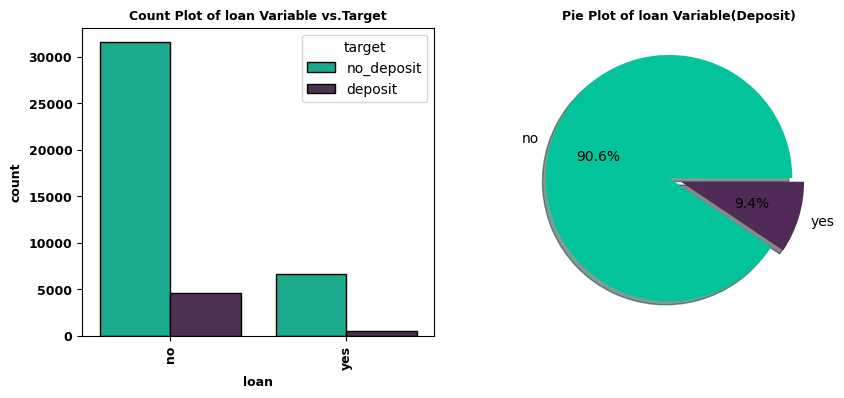

In [ ]:
a_explode=[0.1,0]
visualize_categoricals_variable_vs_target_deposit("loan","Count Plot of loan Variable vs.Target",
                                                  "Pie Plot of loan Variable(Deposit) ",
                                                  a_explode, 10,4)

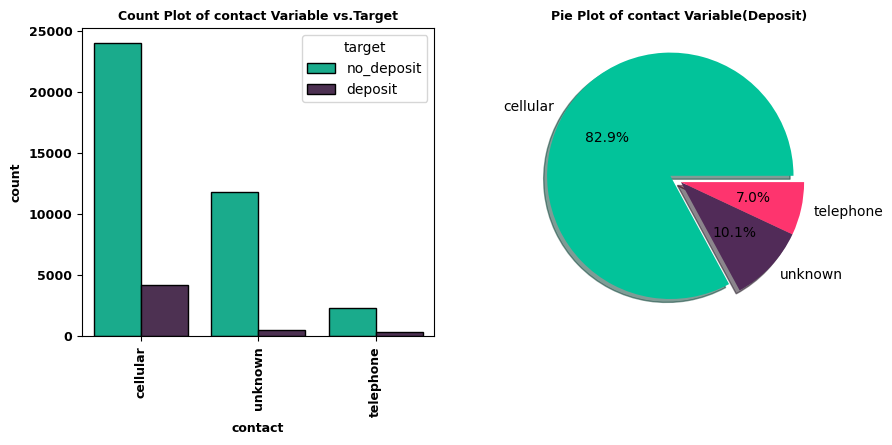

In [ ]:
a_explode=[0.1,0,0]
visualize_categoricals_variable_vs_target_deposit("contact","Count Plot of contact Variable vs.Target",
                                                  "Pie Plot of contact Variable(Deposit) ",
                                                  a_explode, 10,4)

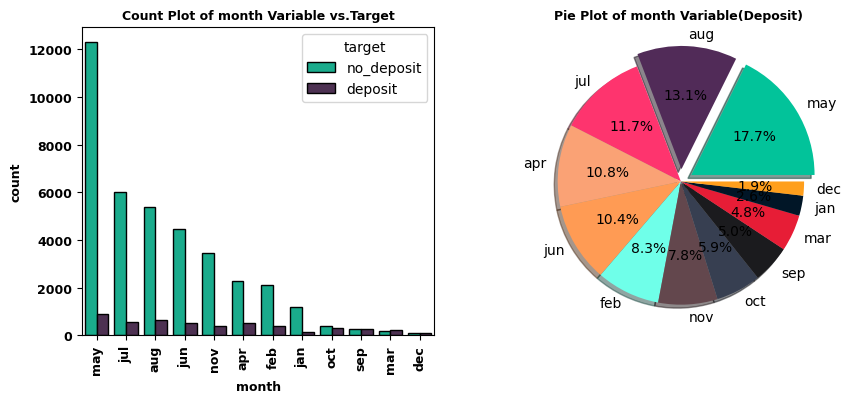

In [ ]:
a_explode=[0.1,0.1]+[0]*(df["month"].nunique()-2)
visualize_categoricals_variable_vs_target_deposit("month","Count Plot of month Variable vs.Target",
                                                  "Pie Plot of month Variable(Deposit) ",
                                                  a_explode, 10,4)

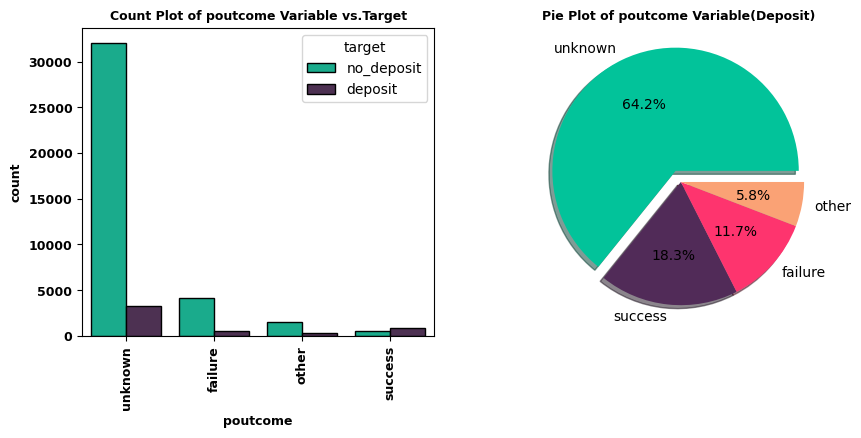

In [ ]:
a_explode=[0.1,0,0,0]
visualize_categoricals_variable_vs_target_deposit("poutcome","Count Plot of poutcome Variable vs.Target",
                                                  "Pie Plot of poutcome Variable(Deposit) ",
                                                  a_explode, 10,4)

In [ ]:
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
#مصور سازی نامریکال ها براساس  توزیع  مقدار انها در deposit , nodeposit

def visualize_Distribution_of_numerical_Variable_deposit_vs_nodeposit(variable, title_of_numerical_Variable1,
                                                                      title_of_numerical_Variable2,
                                                                      a, b, bins ):
  fig = plt.subplots(nrows=1, ncols=2, figsize=(a,b))

  plt.subplot(1,2,1)
  sns.histplot(data= df[df["target"]=="no_deposit"], x=variable, color="purple",
               edgecolor = "black", stat = "percent", element= "bars", bins = bins )
  plt.title(title_of_numerical_Variable1, fontsize=9, fontweight='bold')
  plt.xticks(fontsize=9, fontweight='bold')
  plt.yticks(fontsize=9, fontweight='bold')
  plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
  plt.xlabel(variable, fontsize=9, fontweight='bold')

  plt.subplot(1, 2, 2)
  sns.histplot(data=df[df['target'] == 'deposit'], x=variable, color='purple',
             edgecolor='black', stat='percent', element='bars', bins=bins)


  plt.title(title_of_numerical_Variable2, fontsize=9, fontweight='bold')
  plt.xticks(fontsize=9, fontweight='bold')
  plt.yticks(fontsize=9, fontweight='bold')
  plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
  plt.xlabel(variable , fontsize=9, fontweight='bold')

  plt.show()

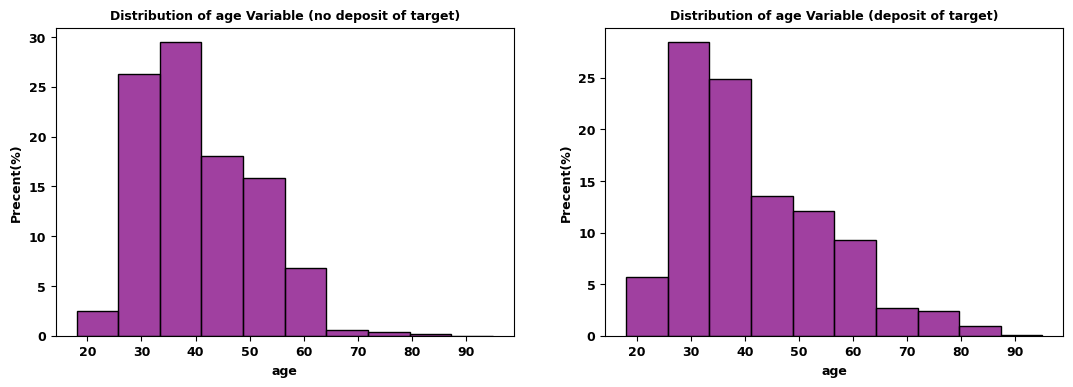

In [ ]:
visualize_Distribution_of_numerical_Variable_deposit_vs_nodeposit("age", "Distribution of age Variable (no deposit of target)",
                                                                  "Distribution of age Variable (deposit of target)",13, 4, 10)

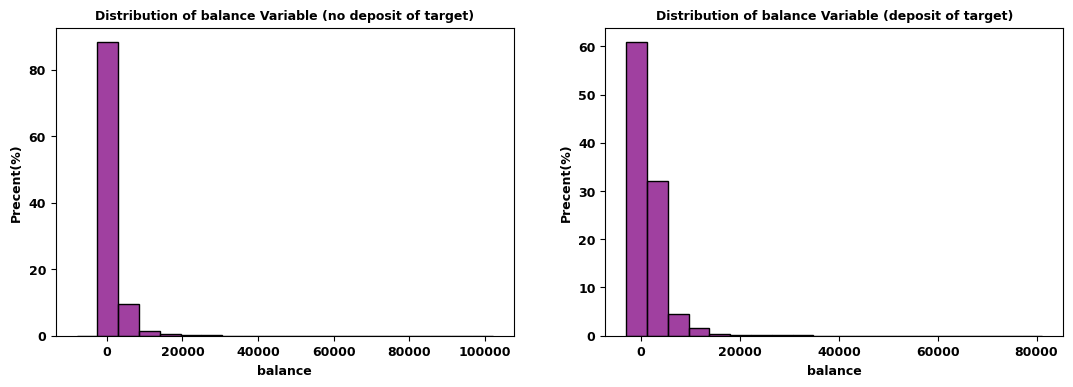

In [ ]:
visualize_Distribution_of_numerical_Variable_deposit_vs_nodeposit("balance", "Distribution of balance Variable (no deposit of target)",
                                                                  "Distribution of balance Variable (deposit of target)",
                                                                  13,4, 20)

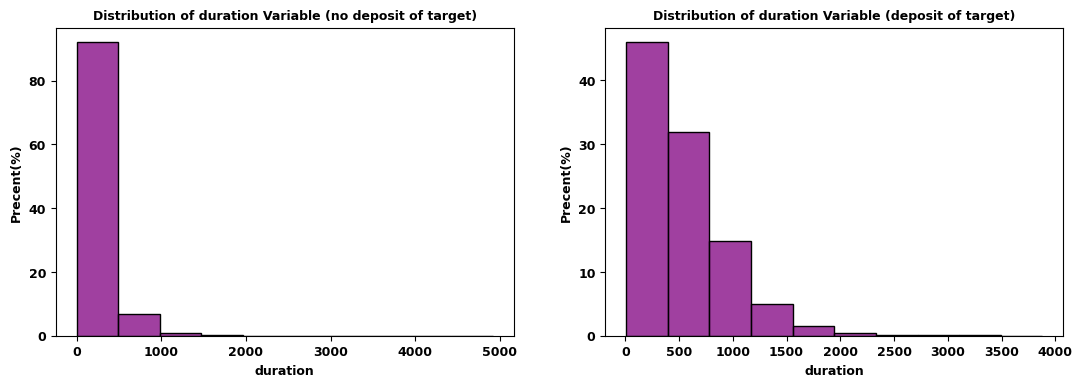

In [ ]:
visualize_Distribution_of_numerical_Variable_deposit_vs_nodeposit("duration", "Distribution of duration Variable (no deposit of target)",
                                                                  "Distribution of duration Variable (deposit of target)",
                                                                  13,4, 10)

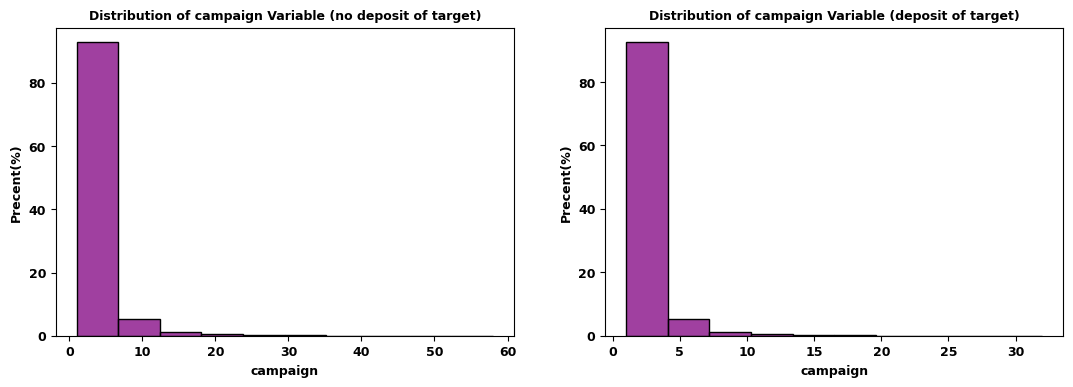

In [ ]:
visualize_Distribution_of_numerical_Variable_deposit_vs_nodeposit("campaign", "Distribution of campaign Variable (no deposit of target)",
                                                                  "Distribution of campaign Variable (deposit of target)",
                                                                  13,4, 10)

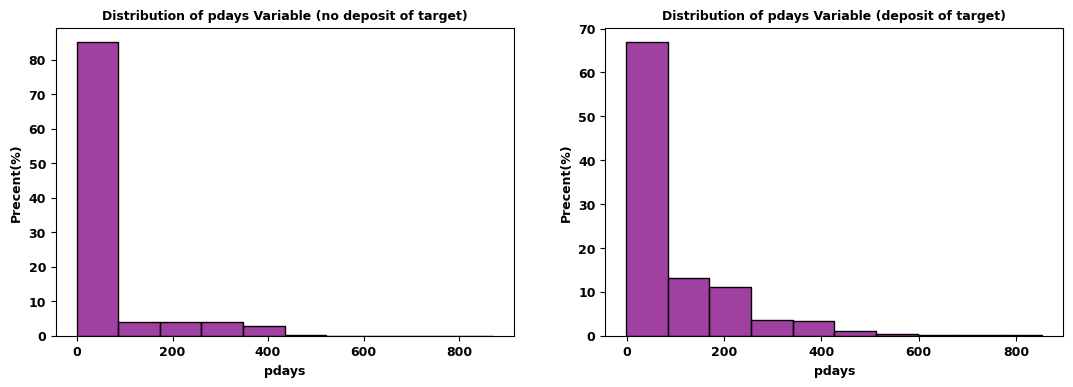

In [ ]:
visualize_Distribution_of_numerical_Variable_deposit_vs_nodeposit("pdays", "Distribution of pdays Variable (no deposit of target)",
                                                                  "Distribution of pdays Variable (deposit of target)",
                                                                  13,4, 10)

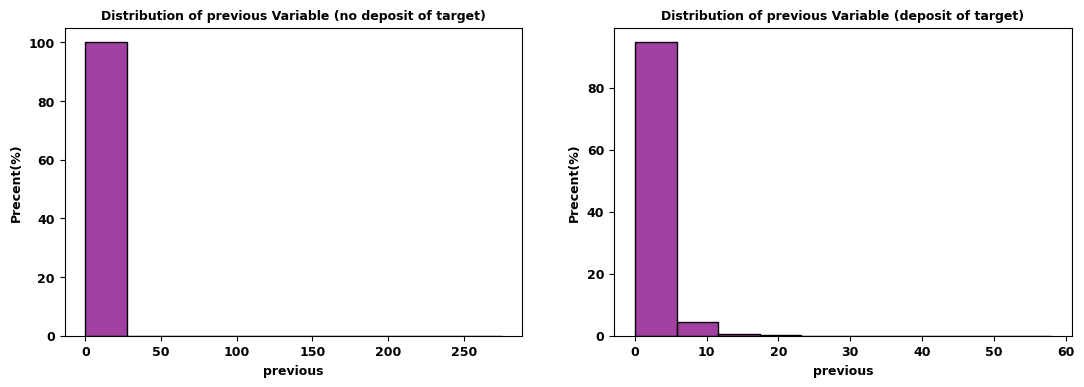

In [ ]:
visualize_Distribution_of_numerical_Variable_deposit_vs_nodeposit("previous", "Distribution of previous Variable (no deposit of target)",
                                                                  "Distribution of previous Variable (deposit of target)",
                                                                  13,4, 10)

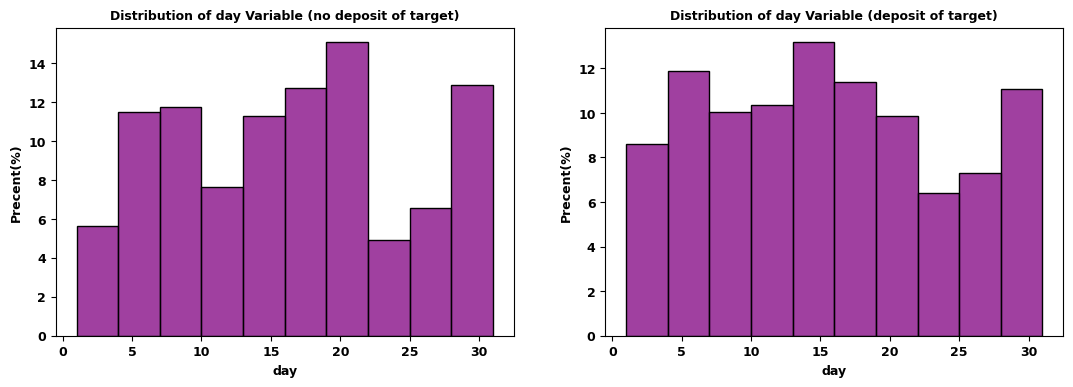

In [ ]:
visualize_Distribution_of_numerical_Variable_deposit_vs_nodeposit("day", "Distribution of day Variable (no deposit of target)",
                                                                  "Distribution of day Variable (deposit of target)",
                                                                  13,4, 10)

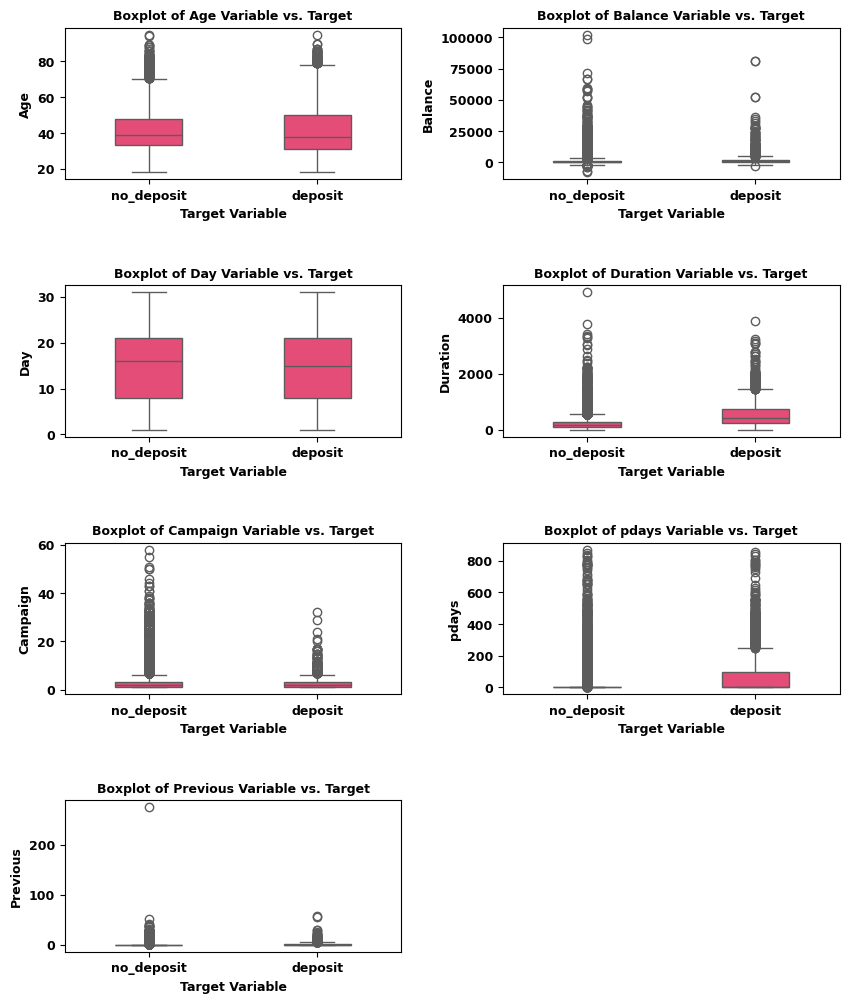

In [ ]:
#مصور سازی نامریکال ها بر اساس ستون تارگت با نمودار باکس پلات

fig, ax= plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.subplot(4, 2, 1)
sns.boxplot(data=df, x='target', y='age', color=colors[2], width=0.4)


plt.title('Boxplot of Age Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Age', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')


plt.subplot(4, 2, 2)
sns.boxplot(data=df, x='target', y='balance', color=colors[2], width=0.4)


plt.title('Boxplot of Balance Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Balance', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

plt.subplot(4, 2, 3)
sns.boxplot(data=df, x='target', y='day', color=colors[2], width=0.4)


plt.title('Boxplot of Day Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Day', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')


plt.subplot(4, 2, 4)
sns.boxplot(data=df, x='target', y='duration', color=colors[2], width=0.4)


plt.title('Boxplot of Duration Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Duration', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

plt.subplot(4, 2, 5)
sns.boxplot(data=df, x='target', y='campaign', color=colors[2], width=0.4)


plt.title('Boxplot of Campaign Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Campaign', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')


plt.subplot(4, 2, 6)
sns.boxplot(data=df, x='target', y='pdays', color=colors[2], width=0.4)


plt.title('Boxplot of pdays Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('pdays', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

plt.subplot(4, 2, 7)
sns.boxplot(data=df, x='target', y='previous', color=colors[2], width=0.4)


plt.title('Boxplot of Previous Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Previous', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

fig.delaxes(ax[3,1])

plt.show()



**همه** کتگوریکال ها بجز **day**نقاط پرت دارند


In [ ]:
def visualize_Boxplot_of_age_Variable_vs_Categorical_Features_Based_Target(variable, title):
  fig = plt.subplots(nrows = 1, ncols =1, figsize = (10,4))
  #plt.subplt(1,1,1)
  sns.boxplot(data= df, x = variable,  y = "age", hue = "target", color = colors[2],
              width = 0.6, gap = 0.15)
  plt.title(title, fontsize = 9, fontweight = "bold")
  plt.xticks(rotation = 45,fontsize = 9, fontweight = "bold")
  plt.yticks(fontsize = 9, fontweight = "bold")
  plt.xlabel(variable, fontsize = 9, fontweight = "bold")
  plt.ylabel("Age", fontsize = 9, fontweight = "bold")
  plt.legend(loc = "upper center")

  plt.show()

In [ ]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'target']

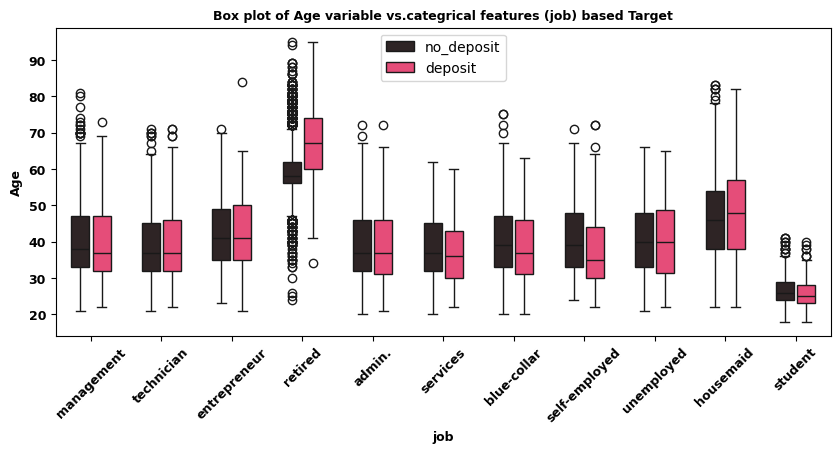

In [ ]:
visualize_Boxplot_of_age_Variable_vs_Categorical_Features_Based_Target("job", "Box plot of Age variable vs.categrical features (job) based Target")

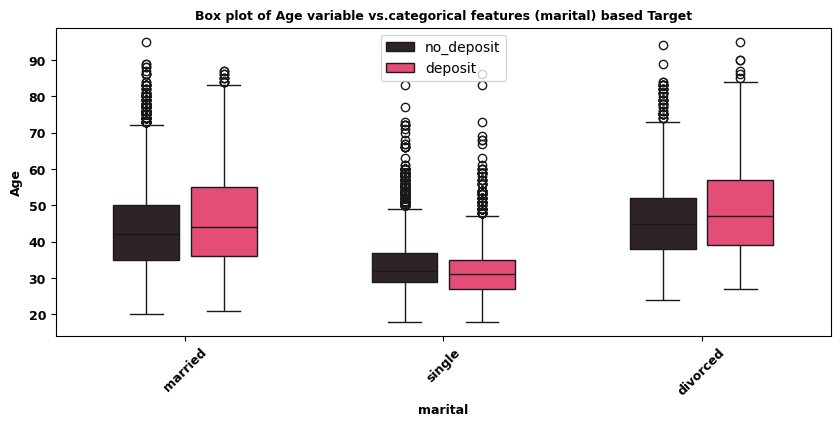

In [ ]:
visualize_Boxplot_of_age_Variable_vs_Categorical_Features_Based_Target("marital", "Box plot of Age variable vs.categorical features (marital) based Target")

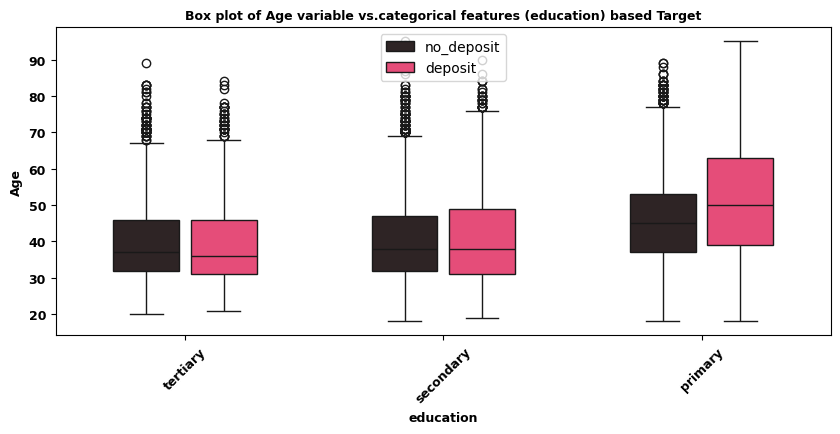

In [ ]:
visualize_Boxplot_of_age_Variable_vs_Categorical_Features_Based_Target("education", "Box plot of Age variable vs.categorical features (education) based Target")

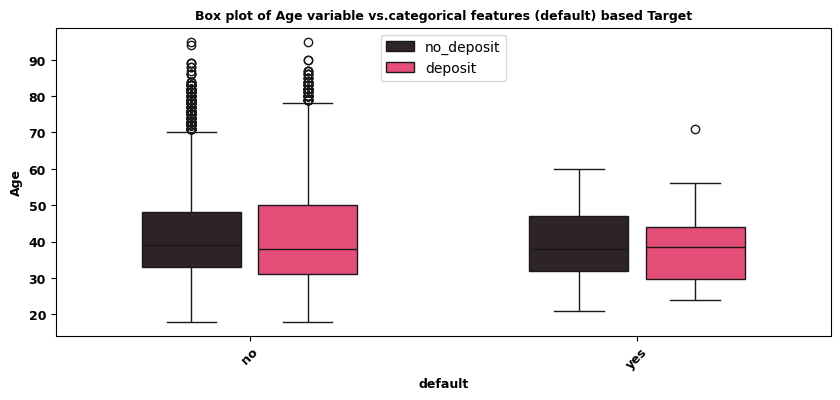

In [ ]:
visualize_Boxplot_of_age_Variable_vs_Categorical_Features_Based_Target("default", "Box plot of Age variable vs.categorical features (default) based Target")

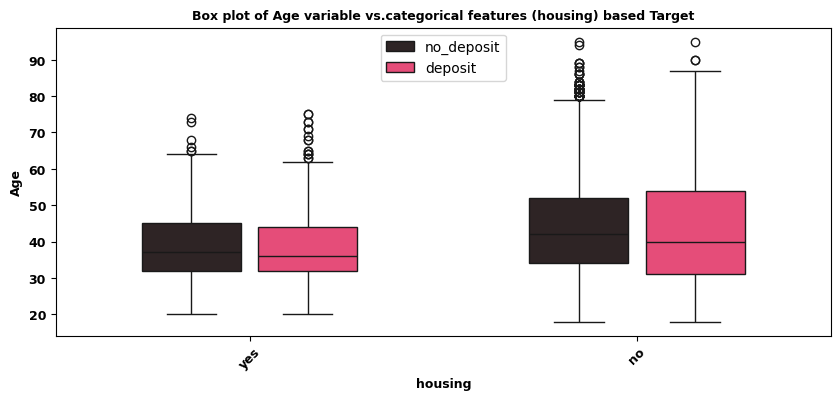

In [ ]:
visualize_Boxplot_of_age_Variable_vs_Categorical_Features_Based_Target("housing", "Box plot of Age variable vs.categorical features (housing) based Target")

In [ ]:
def plot_scatter(data, column1, column2, title=None, xlabel=None, ylabel=None, hue=None):
    if column1 not in data.columns or column2 not in data.columns:
        raise ValueError(f"Columns {column1} and {column2} must exist in the data.")
    if not pd.api.types.is_numeric_dtype(data[column1]) or not pd.api.types.is_numeric_dtype(data[column2]):
        raise ValueError(f"Columns {column1} and {column2} must be numeric.")

    plt.figure(figsize=(7, 4))
    scatter_plot = sns.scatterplot(data= data, x = column1, y = column2, hue = hue , edgecolor = None, s = 20)
    sns.regplot(data = data, x = column1, y = column2, scatter = False, color = "black")

    scatter_plot.set_title(title if title else "scater plot",  fontsize=9, fontweight='bold')
    scatter_plot.set_xlabel(xlabel if xlabel else column1 ,  fontsize=9, fontweight='bold')
    scatter_plot.set_ylabel(ylabel if ylabel else column2,  fontsize=9, fontweight='bold')

    plt.show()



In [ ]:
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

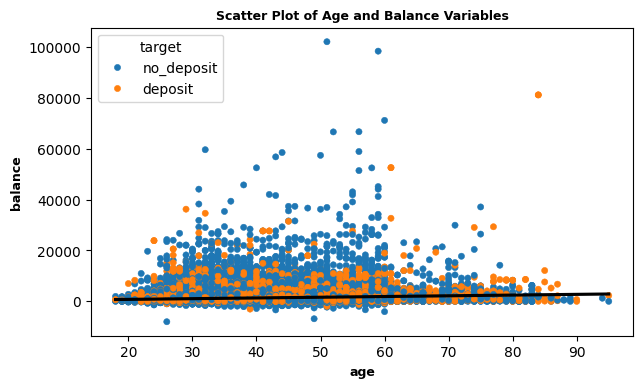

In [ ]:
plot_scatter(data=df, column1="age", column2="balance", title="Scatter Plot of Age and Balance Variables", hue="target")

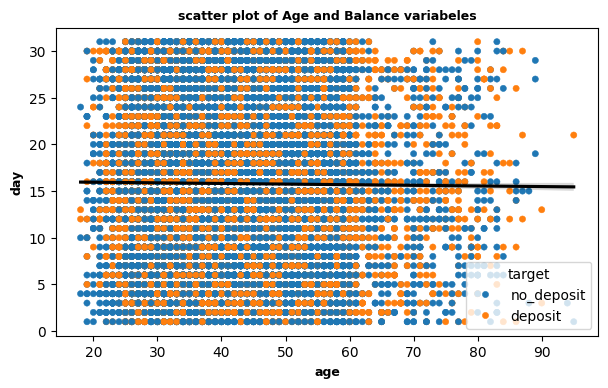

In [ ]:
plot_scatter(data=df, column1="age", column2 = "day", hue="target", title="scatter plot of Age and Balance variabeles"  )

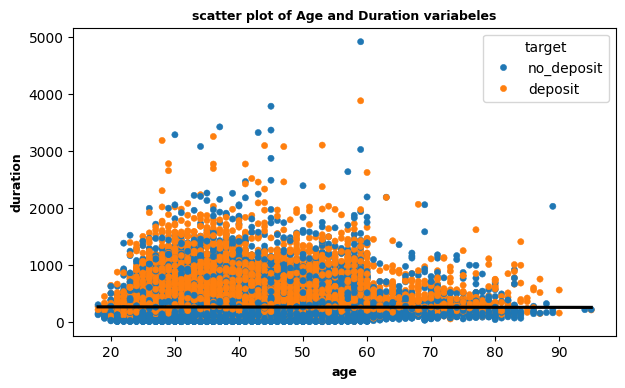

In [ ]:
plot_scatter(data=df , column1 = "age", column2 = "duration", hue="target", title = "scatter plot of Age and Duration variabeles")

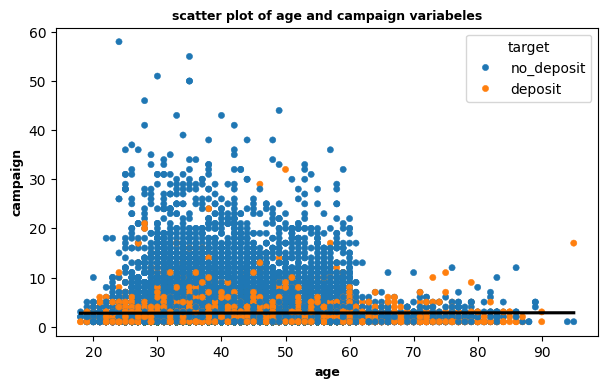

In [ ]:
plot_scatter(data = df, column1="age", column2 = "campaign", hue = "target", title = "scatter plot of age and campaign variabeles" )

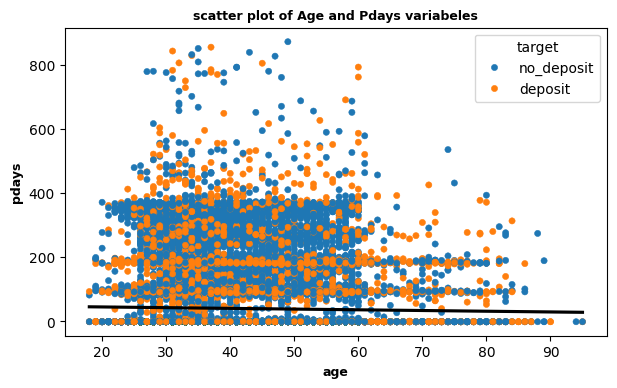

In [ ]:
plot_scatter(data= df, column1 = "age", column2 = "pdays", hue= "target", title="scatter plot of Age and Pdays variabeles")

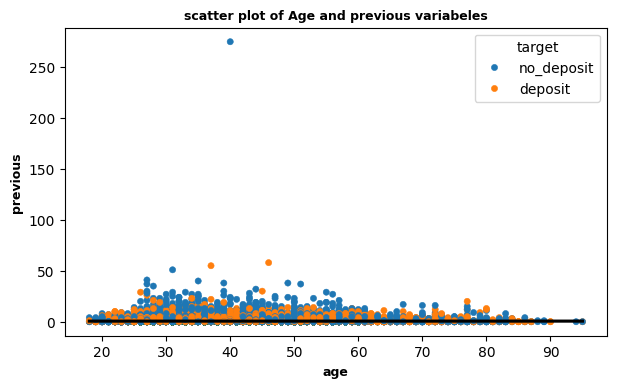

In [ ]:
plot_scatter(data=df , column1= "age", column2 = "previous", hue = "target", title = "scatter plot of Age and previous variabeles")

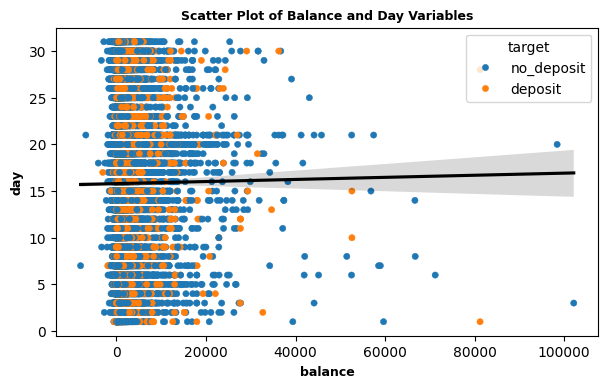

In [ ]:
plot_scatter(df, 'balance', 'day', hue='target', title='Scatter Plot of Balance and Day Variables')

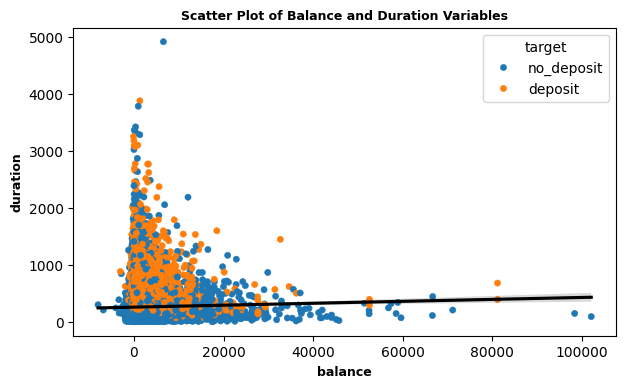

In [ ]:
plot_scatter(df, 'balance', 'duration', hue='target', title='Scatter Plot of Balance and Duration Variables')

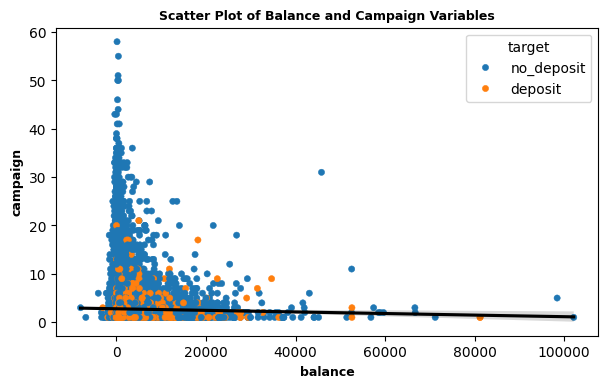

In [ ]:
plot_scatter(df, 'balance', 'campaign', hue='target', title='Scatter Plot of Balance and Campaign Variables')

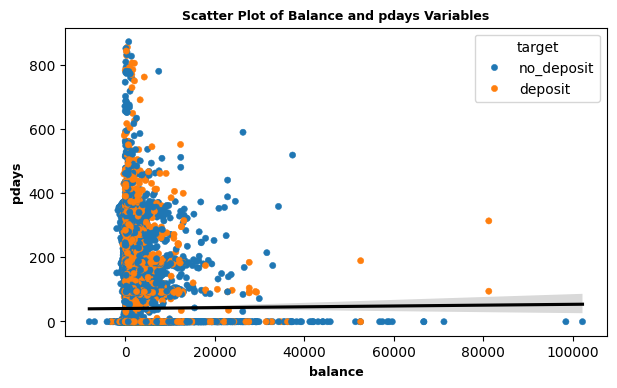

In [ ]:
plot_scatter(df, 'balance', 'pdays', hue='target', title='Scatter Plot of Balance and pdays Variables')

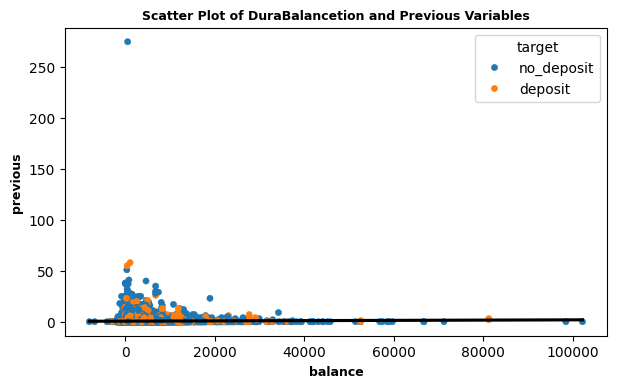

In [ ]:
plot_scatter(df, 'balance', 'previous', hue='target', title='Scatter Plot of DuraBalancetion and Previous Variables')

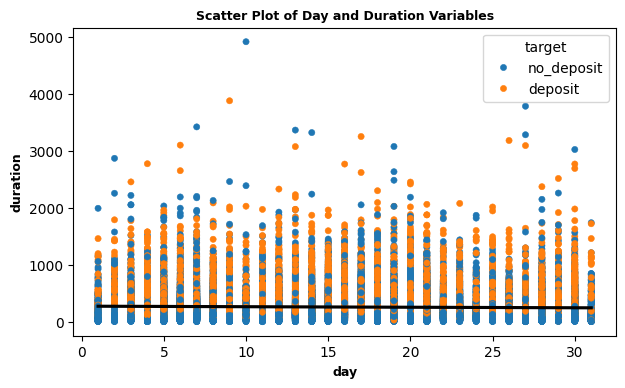

In [ ]:
plot_scatter(df, 'day', 'duration', hue='target', title='Scatter Plot of Day and Duration Variables')

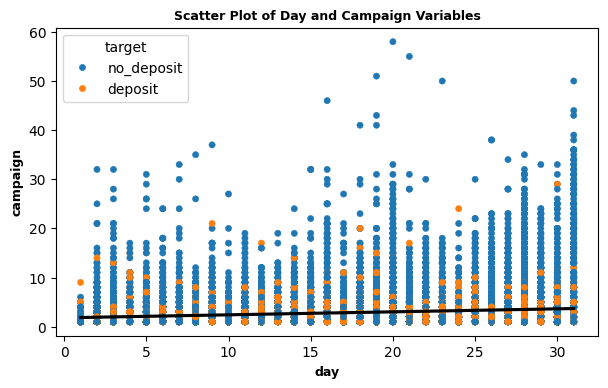

In [ ]:
plot_scatter(df, 'day', 'campaign', hue='target', title='Scatter Plot of Day and Campaign Variables')

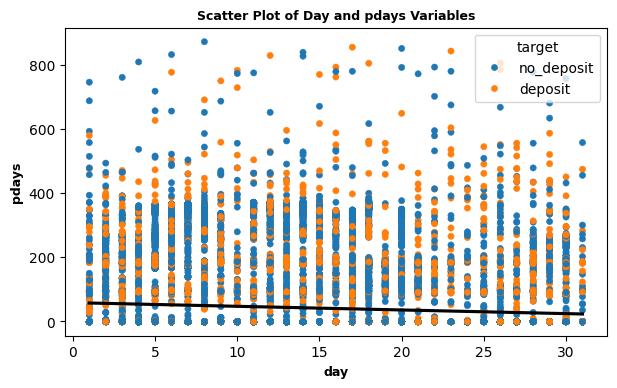

In [ ]:
plot_scatter(df, 'day', 'pdays', hue='target', title='Scatter Plot of Day and pdays Variables')

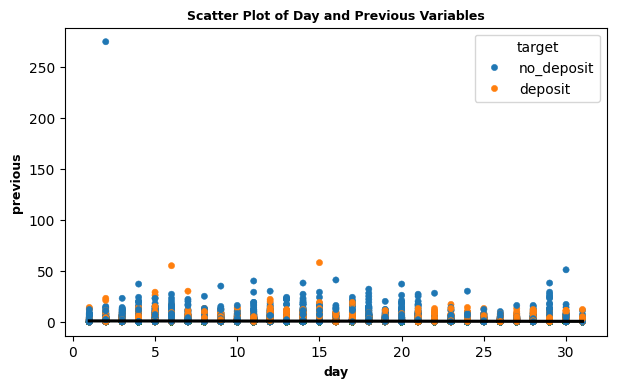

In [ ]:
plot_scatter(df, 'day', 'previous', hue='target', title='Scatter Plot of Day and Previous Variables')

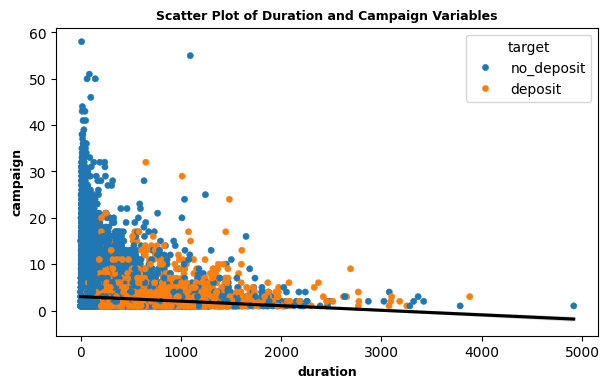

In [ ]:
plot_scatter(df, 'duration', 'campaign', hue='target', title='Scatter Plot of Duration and Campaign Variables')

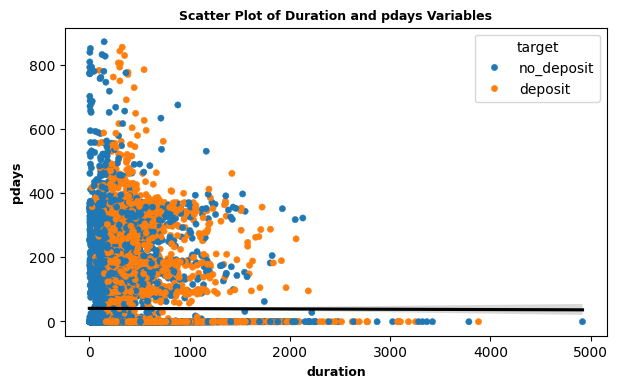

In [ ]:
plot_scatter(df, 'duration', 'pdays', hue='target', title='Scatter Plot of Duration and pdays Variables')

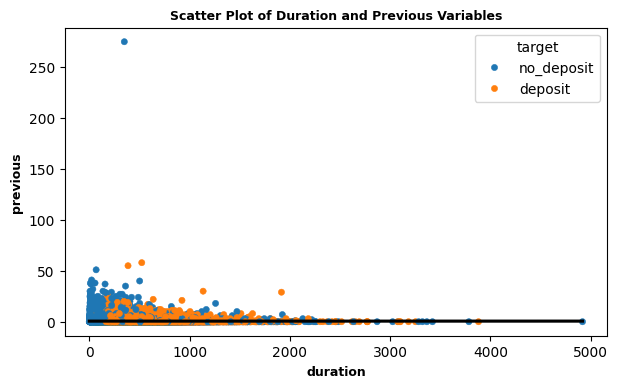

In [ ]:
plot_scatter(df, 'duration', 'previous', hue='target', title='Scatter Plot of Duration and Previous Variables')

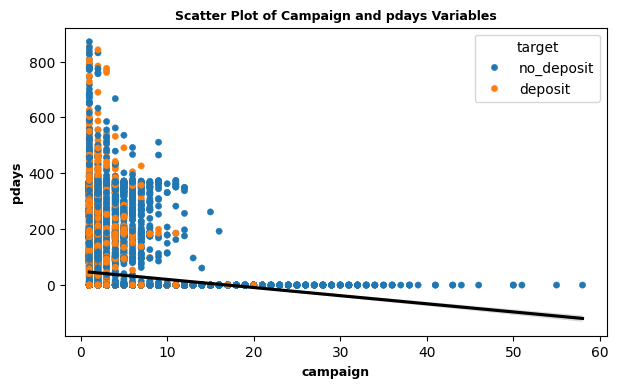

In [ ]:
plot_scatter(df, 'campaign', 'pdays', hue='target', title='Scatter Plot of Campaign and pdays Variables')

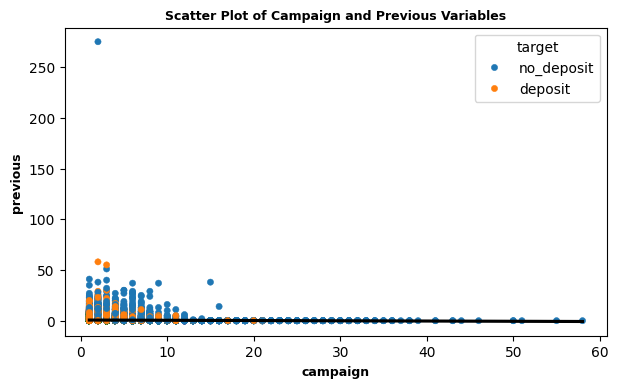

In [ ]:
plot_scatter(df, 'campaign', 'previous', hue='target', title='Scatter Plot of Campaign and Previous Variables')

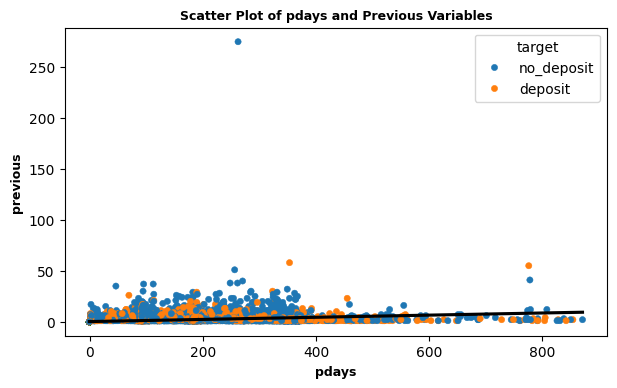

In [ ]:
plot_scatter(df, 'pdays', 'previous', hue='target', title='Scatter Plot of pdays and Previous Variables')



```
```

# Feature scaling

In [ ]:
df["target"].replace({"deposit" : 1, "no_deposit" : 0}, inplace = True)

In [ ]:
df = df[df['balance'] >=0 ]

In [ ]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
columns_to_robust = numerical_features

df[columns_to_robust] = robust.fit_transform(df[columns_to_robust])

df.head()


age           job  marital  education default   balance housing loan  \
0  1.266667    management  married   tertiary      no  1.117524     yes   no   
1  0.333333    technician   single  secondary      no -0.352573     yes   no   
2 -0.400000  entrepreneur  married  secondary      no -0.371349     yes  yes   
5 -0.266667    management  married   tertiary      no -0.212100     yes   no   
6 -0.733333    management   single   tertiary      no -0.061892     yes  yes   

   contact       day month  duration  campaign  pdays  previous poutcome  \
0  unknown -0.846154   may  0.373272      -0.5    0.0       0.0  unknown   
1  unknown -0.846154   may -0.133641      -0.5    0.0       0.0  unknown   
2  unknown -0.846154   may -0.479263      -0.5    0.0       0.0  unknown   
5  unknown -0.846154   may -0.188940      -0.5    0.0       0.0  unknown   
6  unknown -0.846154   may  0.170507      -0.5    0.0       0.0  unknown   

   target  
0       0  
1       0  
2       0  
5       0  
6       0

In [ ]:
from sklearn.preprocessing import StandardScaler

stan = StandardScaler()
columns_to_standard = numerical_features

df[columns_to_standard] = stan.fit_transform(df[columns_to_standard])

df.head()

age           job  marital  education default   balance housing loan  \
0  1.609979    management  married   tertiary      no  0.202844     yes   no   
1  0.292865    technician   single  secondary      no -0.472064     yes   no   
2 -0.742011  entrepreneur  married  secondary      no -0.480684     yes  yes   
5 -0.553852    management  married   tertiary      no -0.407574     yes   no   
6 -1.212409    management   single   tertiary      no -0.338615     yes  yes   

   contact      day month  duration  campaign     pdays  previous poutcome  \
0  unknown -1.29909   may  0.008559 -0.576188 -0.416844 -0.251697  unknown   
1  unknown -1.29909   may -0.416590 -0.576188 -0.416844 -0.251697  unknown   
2  unknown -1.29909   may -0.706464 -0.576188 -0.416844 -0.251697  unknown   
5  unknown -1.29909   may -0.462970 -0.576188 -0.416844 -0.251697  unknown   
6  unknown -1.29909   may -0.161500 -0.576188 -0.416844 -0.251697  unknown   

   target  
0       0  
1       0  
2       0  
5       0  
6       0

# Correlation



```
```

**correlation for numerical**

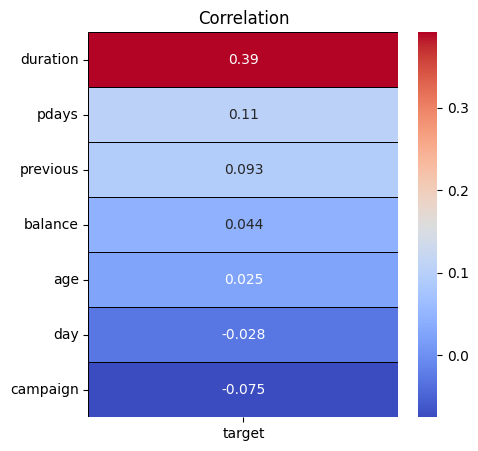

In [ ]:
plt.figure(figsize=(5,5))
corr = df[numerical_features].corrwith(df['target']).sort_values(ascending = False).to_frame()
corr.columns = ["target"]
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, linecolor="black")
plt.title("Correlation")

plt.show()

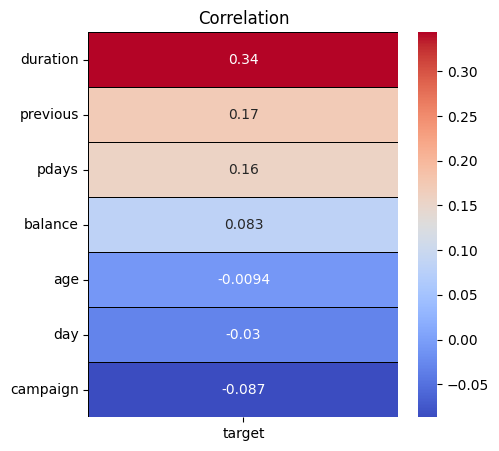

In [ ]:
plt.figure(figsize=(5,5))
corr = df[numerical_features].corrwith(df['target'], method = 'spearman').sort_values(ascending = False).to_frame()
corr.columns = ["target"]
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, linecolor="black")
plt.title("Correlation")

plt.show()

**correlation for categuricals**

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np


df_cat = df[categorical_features]

significant_features : []


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


target = df_cat['target']
cramer_vs = {}
for column in list(df_cat.columns):
    cramer_v = cramers_v(df_cat[column], target)
    cramer_vs[column] = cramer_v


for column, cramer_v in cramer_vs.items():
    print(f"Cramer's V for '{column}': {cramer_v:.2f}")


Cramer's V for 'job': 0.14
Cramer's V for 'marital': 0.07
Cramer's V for 'education': 0.07
Cramer's V for 'default': 0.02
Cramer's V for 'housing': 0.14
Cramer's V for 'loan': 0.07
Cramer's V for 'contact': 0.15
Cramer's V for 'month': 0.26
Cramer's V for 'poutcome': 0.31
Cramer's V for 'target': 1.00


In [ ]:
final_df = df[['job', 'housing', 'contact', 'poutcome', 'month', 'target', 'duration', 'previous', 'pdays']]



```
```

# Convert object to int

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for column in final_df.select_dtypes(include=['object']):
    final_df[column] = encoder.fit_transform(final_df[column])


In [ ]:
final_df.dtypes

job           int64
housing       int64
contact       int64
poutcome      int64
month         int64
target        int64
duration    float64
previous    float64
pdays       float64
dtype: object

In [ ]:
final_df['target'].value_counts()

target
0    34745
1     4814
Name: count, dtype: int64

# to balance

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
over = SMOTE(sampling_strategy = 0.9)
under = RandomUnderSampler(sampling_strategy = 0.3)
f1 = final_df.drop(columns=['target'])
t1 = final_df['target']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 16046, 1: 14441})

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.3, random_state=101)

print(x_train.shape, x_test.shape)

(21340, 8) (9147, 8)


**necessary** **classifiers** **for** **building** **machine** **learning** **models**


In [ ]:
 pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

 **data**  **splitting**,  **model**  **evaluation**  **metrics**, **cross**-**validation**,  **hyperparameter** **tuning**,  **and**   **classification** **performance**





In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, accuracy_score

**Build function**

In [ ]:
def  perform_grid_search_with_best_score(model, param_grid, X_train, y_train, X_test, y_test):
  grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring= "accuracy")
  grid_search.fit(x_train, y_train)

  best_model = grid_search.best_estimator_
  best_params = grid_search.best_params_

  y_pred = best_model.predict(x_test)
  test_score = accuracy_score(y_test, y_pred)

  return  best_params, test_score

def model_evaluation(classifier, X_test, y_test):
  #confusion matrix
  cm = confusion_matrix(y_test, classifier.predict(X_test))
  names = ['True Neg','False Pos','False Neg','True Pos']
  counts = [value for value in cm.flatten()]
  percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

  #classification report
  print(classification_report(y_test, classifier.predict(X_test)))


def plot_roc_curve(y_true, y_scores):
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = roc_curve(y_true, y_scores)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_true, y_scores)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


## **LogisticRegression**   **model**

In [ ]:
logreg = LogisticRegression(max_iter = 1000)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
 }

 # Perform grid search and evaluate best model
best_params, test_score = perform_grid_search_with_best_score(logreg, param_grid, x_train, y_train, x_test, y_test)

# Print results
print("Best Parameters:", best_params)
print("Test Score (Accuracy):", test_score)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Score (Accuracy): 0.7881272548376517


In [ ]:
logreg = LogisticRegression(max_iter=1000, C = 0.1, penalty = 'l1', solver = 'saga')
logreg.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      4793
           1       0.79      0.75      0.77      4354

    accuracy                           0.79      9147
   macro avg       0.79      0.79      0.79      9147
weighted avg       0.79      0.79      0.79      9147



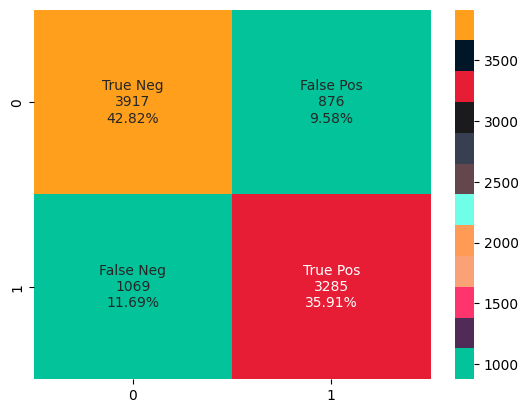

In [ ]:
model_evaluation(logreg, x_test, y_test)

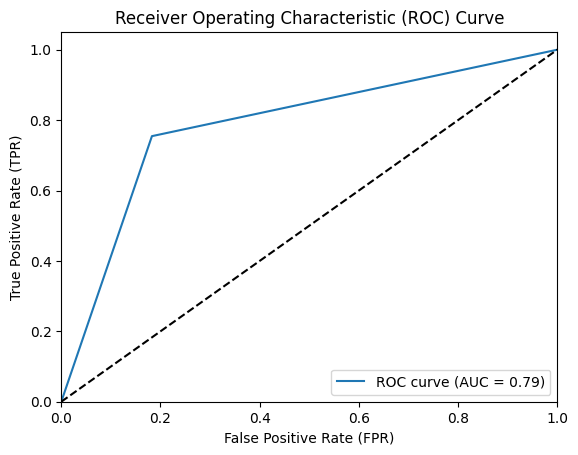

In [ ]:
logreg_prediction = logreg.predict(x_test)
plot_roc_curve(y_test, logreg_prediction)

## **KNeighborsClassifier** **model**

In [ ]:
#define knn model
knn = KNeighborsClassifier()

#define the parametrs grid
param_grid = { "n_neighbors" : [3,5,7,9],
               "weights": ["uniform", "distance"],
               "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
               "p": [1,2]
               }

# Perform grid search and get the best parameters and test score
best_params, test_score = perform_grid_search_with_best_score(knn, param_grid, x_train, y_train, x_test, y_test)

# Print the best parameters and test score
print("Best Parameters:", best_params)
print("Test Score (Accuracy):", test_score)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Test Score (Accuracy): 0.8594074559965016


In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 5, p = 1, weights = 'distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', p=1, weights='distance')

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4793
           1       0.83      0.88      0.85      4354

    accuracy                           0.86      9147
   macro avg       0.86      0.86      0.86      9147
weighted avg       0.86      0.86      0.86      9147



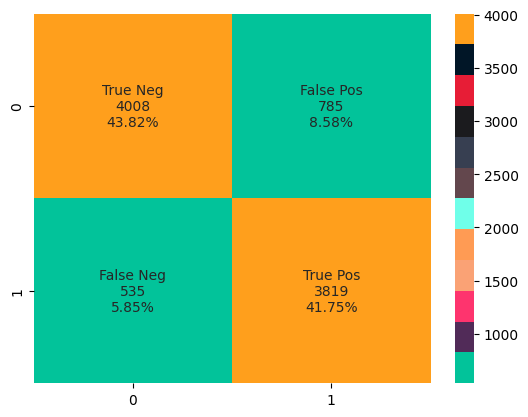

In [ ]:
model_evaluation(knn, x_test, y_test)

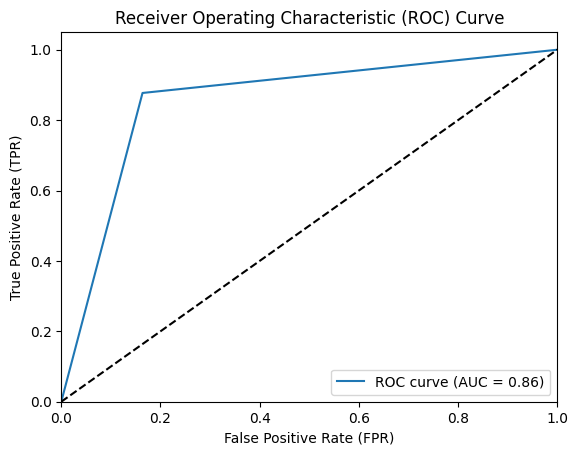

In [ ]:
knn_prediction = knn.predict(x_test)
plot_roc_curve(y_test, knn_prediction)

## **RandomForestClassifier** **model**

In [ ]:
rf = RandomForestClassifier()

#define the parametr grid
param_grid = { "n_estimators" : [50,100, 200],
               "max_depth" : [None, 10 , 20],
               "min_samples_split" :[2, 5, 10],
               "min_samples_leaf" : [1, 2, 4],
               }

# Perform grid search and evaluate best model
best_params, test_score = perform_grid_search_with_best_score(rf, param_grid, x_train, y_train, x_test, y_test)

# Print results
print("Best Parameters:", best_params)
print("Test Score (Accuracy):", test_score)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Test Score (Accuracy): 0.8664042855581064


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 20, min_samples_split = 5, min_samples_leaf = 2)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4793
           1       0.84      0.89      0.86      4354

    accuracy                           0.87      9147
   macro avg       0.87      0.87      0.87      9147
weighted avg       0.87      0.87      0.87      9147



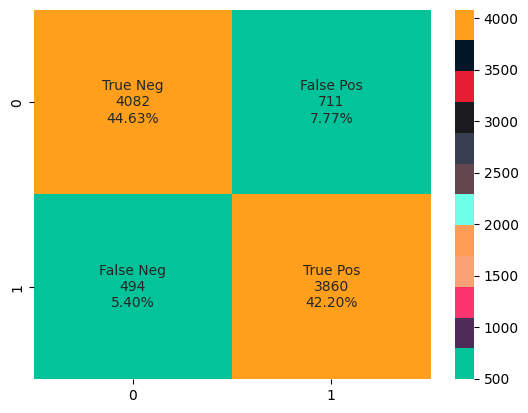

In [ ]:
model_evaluation(rf, x_test, y_test)

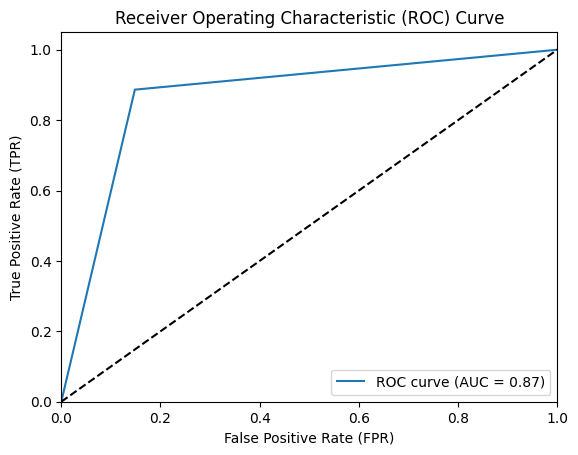

In [ ]:
rf_prediction = rf.predict(x_test)
plot_roc_curve(y_test, rf_prediction)

## **SVC** **Model**

In [ ]:
svc = SVC()
#define the parametr grid
param_grid = {
    "C": [0.1,1, 10],
    "gamma": [1, 0.1,0.01 , 0.001],
    "kernel": ["linear", "rbf", "poly", "sigmoid"]
}

# Perform grid search and evaluate best model
best_params, test_score = perform_grid_search_with_best_score(svc, param_grid, x_train, y_train, x_test, y_test)

# Print results
print("Best Parameters:", best_params)
print("Test Score (Accuracy):", test_score)